In [1]:
import os
import numpy as np
from numpy import reshape
import torch

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pandas as pd
from pathlib import Path
home = str(Path.home())
base_path = os.path.join(home, 'workspace/multiLID/data/extract/run_1/')

In [183]:
NR_SAMPLES=100

In [182]:
nor_fgsm = torch.load(os.path.join(base_path, 'cifar10/wrn28-10/multilid/fgsm/k20/multilid_normalos_8255.pt')).numpy()[1900:]
adv_fgsm = torch.load(os.path.join(base_path, 'cifar10/wrn28-10/multilid/fgsm/k20/multilid_adverlos_8255.pt')).numpy()[1900:]

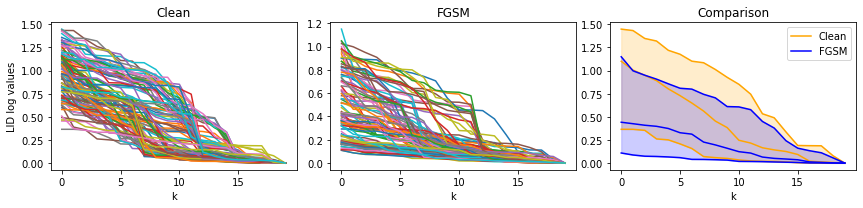

In [217]:
# Create the figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 3))

# Set the y-axis label for the leftmost plot
axs[0].set_ylabel('LID log values')

# Set the column titles and x-axis label for each plot
label2='FGSM'
titles = ['Clean', label2, 'Comparison']
x_label = 'k'

color1='orange'
color2='blue'


for i, ax in enumerate(axs):
    ax.set_title(titles[i])
    ax.set_xlabel(x_label)
    if i == 0:
        for j in range(NR_SAMPLES):
            ax.plot(nor_fgsm[j,:,-1]) 
            # ax.plot(np.mean(nor_fgsm[j], axis=1))  
    elif i == 1:
        for j in range(NR_SAMPLES):
            ax.plot(adv_fgsm[j,:,-1])
            # ax.plot(np.mean(adv_fgsm[j], axis=1))

    elif i == 2:
        nor_agv = nor_mean[:,-1]
        nor_min = np.min(nor_fgsm[:,:,-1], axis=0)
        nor_max = np.max(nor_fgsm[:,:,-1], axis=0)
        ax.plot(nor_agv, color=color1, label='Clean')
        ax.plot(nor_min, color=color1, label='Clean')
        ax.plot(nor_max, color=color1, label='Clean')
        ax.fill_between(np.arange(20),  nor_min, nor_max, alpha=0.2, color=color1, label='Clean')
            
        adv_agv = adv_mean[:,-1]
        adv_min = np.min(adv_fgsm[:,:,-1], axis=0)
        adv_max = np.max(adv_fgsm[:,:,-1], axis=0)
        ax.plot(adv_agv, color=color2, label=label2)
        ax.plot(adv_min, color=color2, label=label2)
        ax.plot(adv_max, color=color2, label=label2)
        ax.fill_between(np.arange(20),  adv_min, adv_max, alpha=0.2, color=color2, label=label2)
            
            
# Add legend to the last plot
axs[2].legend(['Clean', label2])
leg = axs[2].get_legend()
leg.legendHandles[0].set_color(color1)
leg.legendHandles[1].set_color(color2)

# Remove y-axis ticks from the second and third column plots
# axs[1].set_yticks([])
# axs[2].set_yticks([])

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

In [220]:
fig.savefig( 'plots/' + 'lines/' + 'fgsm_example_lid_k20.png', bbox_inches='tight', dpi=600)